In [131]:
import warnings; warnings.filterwarnings('ignore') # suppression des 'warning' de l'interpréteur
import numpy as np
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from IPython.display import display, Image

In [132]:
def convolve(f, G):
    ''' appliquer une convolution bidimensionnelle à une image ou à une matrice en utilisant un noyau spécifié '''
    return convolve2d(f, G, mode='same', boundary='symm')

# Exercice 1. ( Interpolation, Zoom)

## 1- Création d'image

In [133]:
u = np.zeros((8, 4))

u[0, 0] = 2
u[2, 2] = 2
u[2, 3] = 1/2 
u[1, 2] = 3/2
u[1, 3] = 3/2

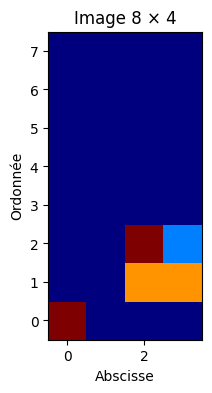

In [134]:
plt.figure(figsize=(8, 4))
plt.imshow(u, origin='lower', interpolation = "none", cmap = "jet")           
plt.title(f'Image 8 × 4')
plt.xlabel('Abscisse')            
plt.ylabel('Ordonnée')
plt.show()

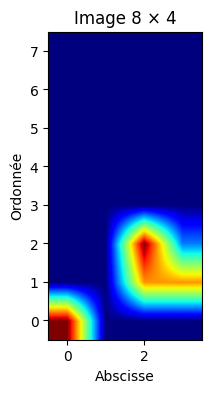

In [135]:
plt.figure(figsize=(8, 4))
plt.imshow(u, origin='lower', interpolation = "bilinear", cmap = "jet")           
plt.title(f'Image 8 × 4')
plt.xlabel('Abscisse')            
plt.ylabel('Ordonnée')
plt.show()

In [136]:
# Enregistrement de l'image
plt.imsave("image_u.png", u, cmap='gray')

In [137]:
# Affichage de l'image avec un facteur de zoom x64
display(Image(filename="image_u.png", width=u.shape[1]*64, height=u.shape[0]*64))

In [138]:
# Charger l'image
tshirt = plt.imread("tshirt.png")

# TFD2D de tshirt
F_tshirt = fft2(tshirt)

In [139]:
m,n = tshirt.shape

In [140]:
# Création de v
v = np.zeros((2*m, 2*n), dtype = np.complex128)

In [141]:
v[:n//2, :m//2] = F_tshirt[:n//2, :m//2]  # Coin supérieur gauche
v[-n//2:, :m//2] = F_tshirt[-n//2:, :m//2]  # Coin inférieur gauche
v[:n//2, -m//2:] = F_tshirt[:n//2, -m//2:]  # Coin supérieur droit
v[-n//2:, -m//2:] = F_tshirt[-n//2:, -m//2:]  # Coin inférieur droit

In [142]:
image_v = np.abs(ifft2(v))

In [143]:
# Création de v1
v1 = np.zeros((2*m, 2*n), dtype = np.complex128)
v1[m//2:m + m//2, n//2:n + n//2] = F_tshirt

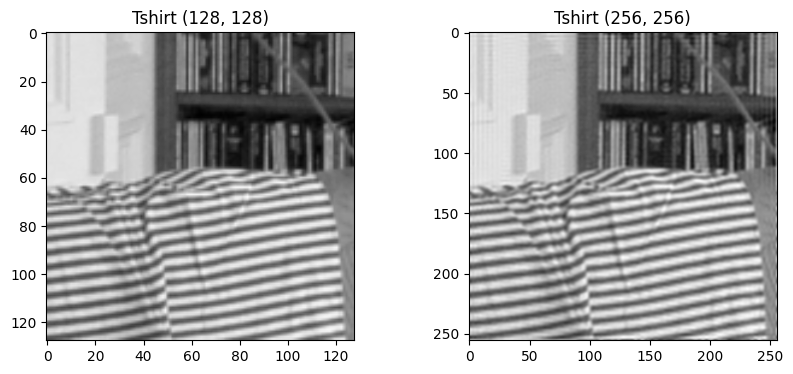

In [144]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(tshirt, cmap = "gray", interpolation = "bilinear")           
plt.title(f"Tshirt ({tshirt.shape[0]}, {tshirt.shape[1]})")
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')

plt.subplot(1, 2, 2)
plt.imshow(image_v, cmap = "gray", interpolation = "bilinear")           
plt.title(f"Tshirt ({image_v.shape[0]}, {image_v.shape[1]})")
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')
plt.show()

In [145]:
gt_x, gt_y = np.gradient(tshirt, axis =(0,1))

contours_t = np.sqrt(gt_x**2 + gt_y**2)

gv_x, gv_y = np.gradient(image_v, axis =(0,1))

contours_v = np.sqrt(gv_x**2 + gv_y**2)

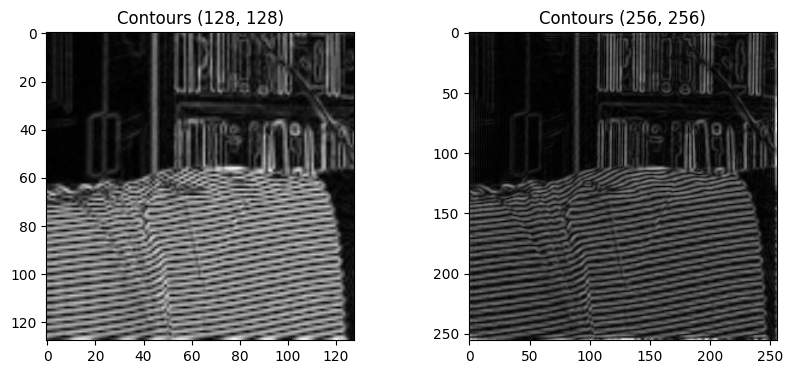

In [146]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(contours_t, cmap = "gray", interpolation = "bilinear")           
plt.title(f"Contours ({tshirt.shape[0]}, {tshirt.shape[1]})")
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')

plt.subplot(1, 2, 2)
plt.imshow(contours_v, cmap = "gray", interpolation = "bilinear")           
plt.title(f"Contours ({image_v.shape[0]}, {image_v.shape[1]})")
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')
plt.show()

In [147]:
# Charger l'image
room = plt.imread("room.png")

# Réduire l'image en prenant un pixel sur quatre dans chaque direction
room_4pix = room[::4, ::4] 

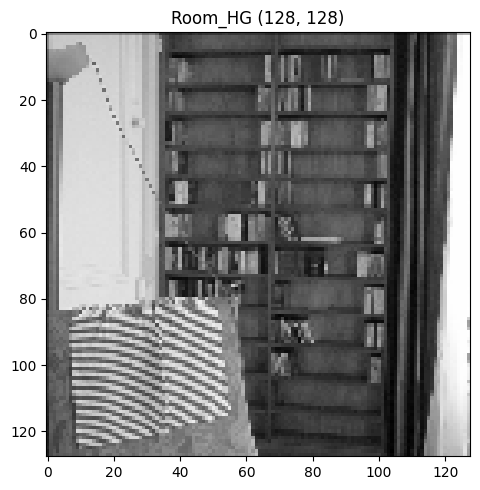

In [148]:
plt.figure(figsize=(7, 5))

plt.imshow(room_4pix, cmap = "gray")           
plt.title(f"Room_HG ({room_4pix.shape[0]}, {room_4pix.shape[1]})")
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')
plt.tight_layout()
plt.show() ;

In [149]:
# Enregistrement de l'image
plt.imsave("room_4pix.png", room_4pix, cmap='gray')

In [150]:
# Calcul des transformés de fourier

Froom = fft2(room)

Froom_4pix = fft2(room_4pix)

In [151]:
# Calcul des spectres

Sp_room = fftshift(np.log(1 + np.abs(Froom)))

Sp_room_4pix = fftshift(np.log(1 + np.abs(Froom_4pix)))

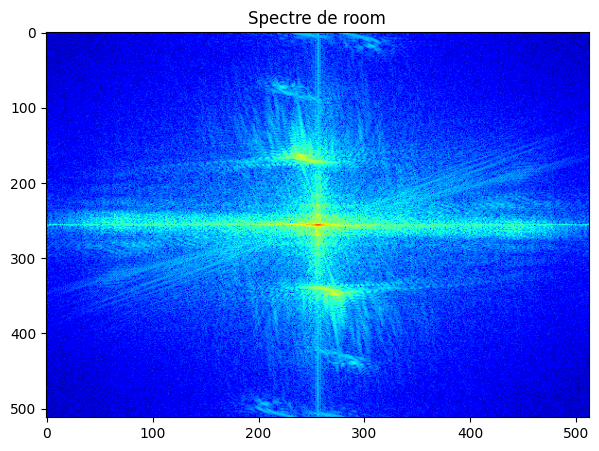

In [152]:
plt.figure(figsize=(7, 5))
plt.imshow(Sp_room, cmap = "jet", aspect = "auto")           
plt.title('Spectre de room')
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')
plt.show()

<Figure size 800x800 with 0 Axes>

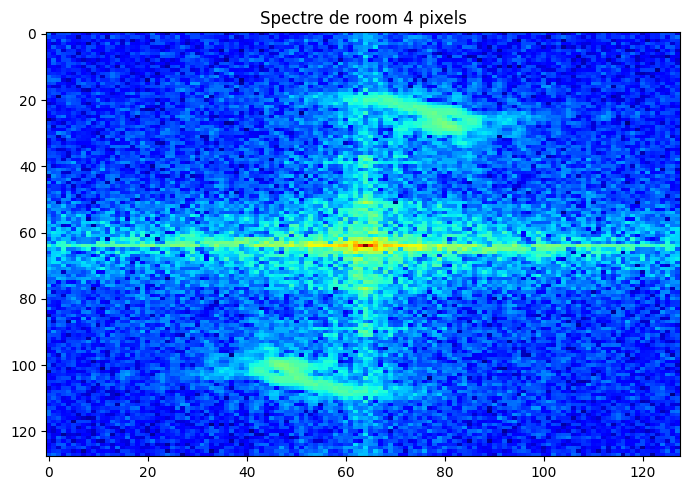

In [153]:
plt.figure(figsize=(8, 8))

plt.figure(figsize=(7, 5))
plt.imshow(Sp_room_4pix, cmap = "jet", aspect = "auto")           
plt.title('Spectre de room 4 pixels')
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')

plt.tight_layout()
plt.show() ;

In [154]:
L = 10
# Générer le noyau du filtre moyenneur
h = np.ones((2*L-1,2*L-1))
# h = np.ones_like(room)
h[L//2:-L//2,L//2:-L//2] = 0

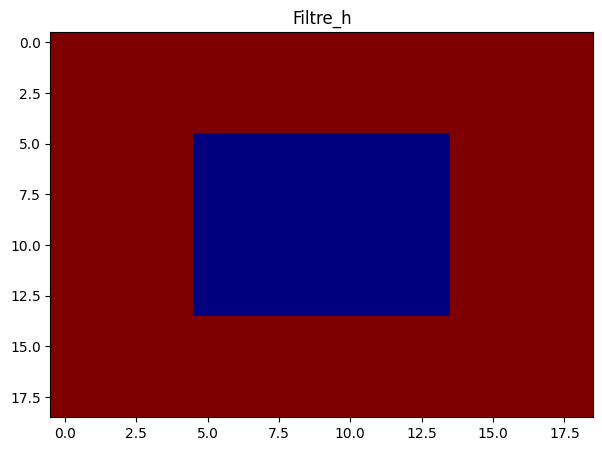

In [155]:
plt.figure(figsize=(7, 5))
plt.imshow(h, cmap = "jet", aspect = "auto")           
plt.title('Filtre_h')
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')
plt.show()

In [156]:
room_filt = convolve(room,h)

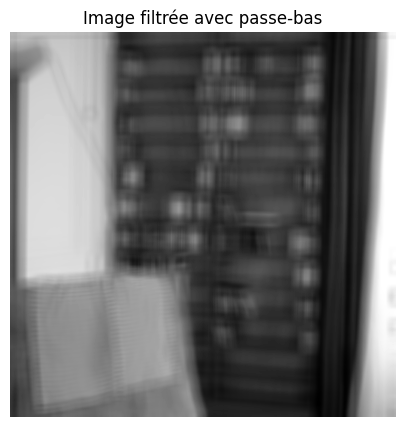

In [157]:
# Afficher les images
plt.figure(figsize=(10, 5))
plt.imshow(room_filt, cmap='gray')
plt.title('Image filtrée avec passe-bas')
plt.axis('off')

plt.show()

In [158]:
# Réduire l'image en prenant un pixel sur quatre dans chaque direction
room_filt_4pix = room_filt[::4, ::4]

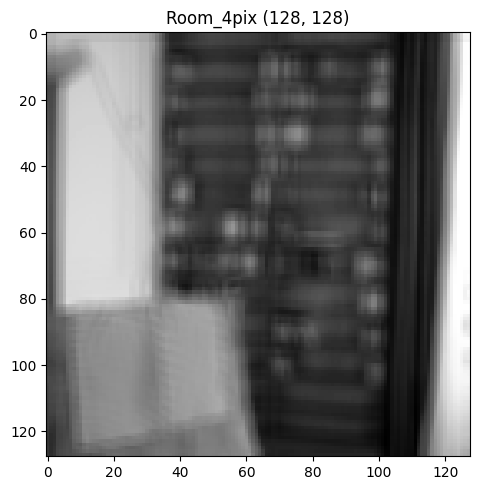

In [159]:
plt.figure(figsize=(7, 5))

plt.imshow(room_filt_4pix, cmap = "gray")           
plt.title(f"Room_4pix ({room_filt_4pix.shape[0]}, {room_filt_4pix.shape[1]})")
# plt.xlabel('Abscisse')            
# plt.ylabel('Ordonnée')

plt.tight_layout()
plt.show() ;

# Exercice 2. (Débruitage par filtrage de Wiener)

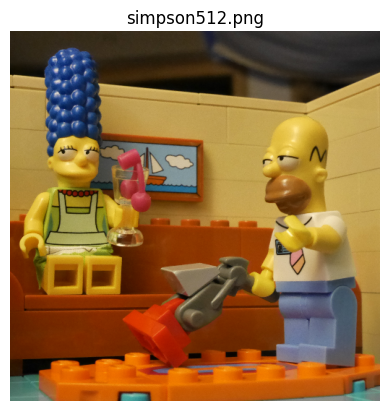

In [160]:
# Charger l'image couleur
simpson = plt.imread("simpson512.png")

# Afficher l'image
plt.imshow(simpson)
plt.title('simpson512.png')
plt.axis('off')
plt.show()

In [161]:
# Définir l'écart-type du bruit gaussien
sigma = 11

# Générer un bruit blanc gaussien de la même taille que l'image
noise = np.random.randn(*simpson.shape) * sigma

# Ajouter le bruit à l'image originale
noisy_simpson = simpson + noise

# Clipper les valeurs de l'image bruitée dans la plage valide [0, 255]
noisy_simpson = np.clip(noisy_simpson, 0, 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


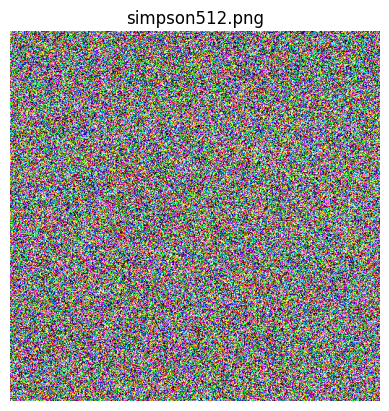

In [162]:
# Afficher l'image
plt.imshow(noisy_simpson)
plt.title('simpson512.png')
plt.axis('off')
plt.show()